# Hierarchical Clustering

# Problem Statement

- The average retention rate in the insurance industry is 84%, with the top-performing agencies in the 93%-95% range. 
- Retaining customers is all about the long-term relationship you build.
- Offer a discount on the client's current policy will ensure he/she buys a new product or renews the current policy.
- Studying clients' purchasing behavior to figure out which types of products 
- they're most likely to buy is very essential. 


# Insurance company wants to analyze their customer's behaviour to device offers to increase customer loyalty.

CRISP-ML(Q) process model describes six phases:
 1. Business and Data Understanding
 2. Data Preparation
 3. Model Building
 4. Model Evaluation
 5. Deployment
 6. Monitoring and Maintenance

# Objective(s): Maximize the Sales 
# Constraints: Minimize the Customer Retention

 Business Success Criteria: Increase the Sales by 10% to 12% by targeting cross-selling opportunities for current customers.

 ML Success Criteria: Achieve a Silhouette coefficient of at least 0.6

 Economic Success Criteria: The insurance company will see an increase in revenues by at least 8%


# Data Dictionary:
    1. Dataset contains 9134 customer details.
    2. 23 features are recorded for each customer 

# Data Description:
    Customer - specifies the Customer ID
    State    - Location (state) of the  Customer
    Customer Lifetime Value - CLV estimated revenue or profit that the insurance company can expect to generate from this particular customer throughout their relationship. 
    Response - Indicates whether the customer responded positively (Yes) or negatively (No) to a specific action or offer
    Coverage - Specifies the level of coverage or insurance plan the customer has, such as Basic, Extended, or Premium.
    Education - Represents the highest level of education attained by the customer, such as High School, Bachelor's, or Master's degree.
    Effective To Date - Refers to the date when the insurance policy becomes effective or starts.
    Employment Status - Describes the current employment status of the customer, such as Employed, Unemployed, or Retired.
    Gender   -  Specifies the gender of the customer as either Male (M) or Female (F).
    Income   - Represents the annual income of the customer.
    Location Code: Indicates the code or category for the customer's location, such as Suburban, Rural, or Urban.
    Marital Status: Represents the current marital status of the customer, such as Single, Married, or Divorced.
    Monthly Premium Auto: Refers to the amount the customer pays each month as a premium for their auto insurance policy.
    Months Since Last Claim: Indicates the number of months that have passed since the customer's most recent insurance claim.
    Months Since Policy Inception: Represents the number of months that have elapsed since the customer's insurance policy was initiated or started.
    Number of Open Complaints: Specifies the total number of open or unresolved complaints that the customer has made to the insurance company.
    Number of Policies: Indicates the total number of insurance policies held by the customer.
    Policy Type: Describes the type or category of the insurance policy, such as Personal Auto or Corporate Auto.
    Policy: Specifies the specific policy identifier or name associated with the customer's insurance coverage.
    Renew Offer Type: Represents the type of offer made to the customer to encourage policy renewal, such as Offer1, Offer2, etc.
    Sales Channel: Indicates the channel or method through which the policy was sold or marketed, such as Agent, Branch, or Call Center.
    Total Claim Amount: Represents the total amount claimed by the customer for all insurance claims made.
    Vehicle Class: Describes the class or type of vehicle insured.
    Vehicle Size: Specifies the size or category of the insured vehicle, such as Small, Medium, or Large.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from AutoClean import AutoClean
import sweetviz
from clusteval import clusteval 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
import pickle
from feature_engine.outliers import Winsorizer
import dtale

In [3]:
df = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Course/Machine Learning/1. Hierarchical Clustering/Mod3a.Hierarchical Clustering/AutoInsurance.csv")

In [4]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Data Preprocessing

# **Cleaning Unwanted columns**
# Customer contains ID which is the identity to each customer. 
# "Effective To Date" column does not provide any meaningful information or is not relevant to the analysis 
# "Policy Type" is sufficient to capture the necessary information, so we can drop the Policy column 
# Analytically it does not have any value (Nominal data). 
# We can safely ignore the columns ('Customer', 'Effective To Date', 'Policy', 'Sales Channel') by dropping the column.

df1 = df.drop(['Customer', 'Effective To Date', 'Response'], axis = 1)
df1.info()
df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [30]:
# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS
# ***Descriptive Statistics and Data Distribution Function***

df1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [31]:
# find any missing values 
df1.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Renew Offer Type                 0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [28]:
# AutoEDA
d = dtale.show(df1)
d.open_browser()


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


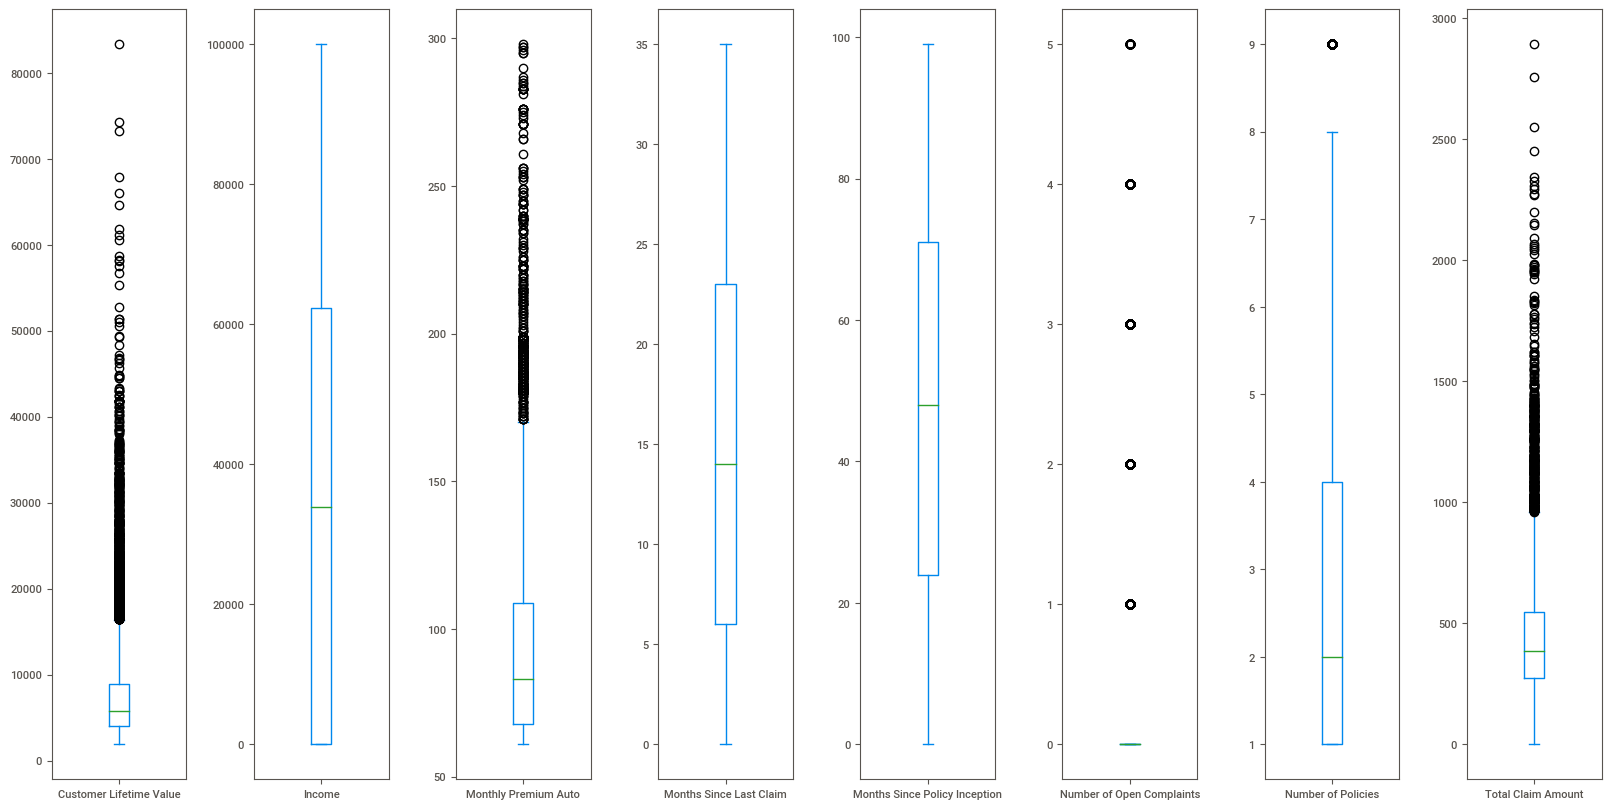

In [29]:
# Outliers:  Detected exceptional values in 4 columns: Customer Lifetime Value, Monthly Premium Auto, Total Claim Amount, Number of Policies
# Boxplot
df1.plot(kind = 'box', subplots = True, sharey = False, figsize = (20,10))
plt.subplots_adjust(wspace = 0.5)
plt.show()


In [35]:
# Segregate Numeric columns from dataframe 
numerical_features = df1.select_dtypes(exclude = ['object']).columns
numerical_features


Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [34]:
# Segregate Non-numeric columns from dataframe
categorical_features = df1.select_dtypes(include = ['object']).columns
categorical_features

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type',
       'Renew Offer Type', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [38]:
# Define Pipeline to deal with scaling numeric columns
Num_pipeline = Pipeline([('scale', MinMaxScaler())])
Num_pipeline


Pipeline(steps=[('scale', MinMaxScaler())])

In [39]:
# Define Pipeline to deal with encoding categorical columns
Categ_pipeline = Pipeline(([('OnehotEncode', OneHotEncoder())]))
Categ_pipeline

Pipeline(steps=[('OnehotEncode', OneHotEncoder())])

In [40]:
Processed_pipeline = ColumnTransformer([('categorical', Categ_pipeline, categorical_features),
('numerical', Num_pipeline, numerical_features)], remainder = 'passthrough')

Processed_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('OnehotEncode',
                                                  OneHotEncoder())]),
                                 Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type',
       'Renew Offer Type', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object'))])

In [41]:
Processed = Processed_pipeline.fit_transform(df1)


In [ ]:
joblib.dump(Processed, 'Processed')